
# Project: Data Wrangling ( WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assess">Assissing Data</a></li>
<li><a href="#observ">Observations</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
The dataset the we will analyse is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. <br/>
In this project we will analyze and visualize date and extrat insights about this data, but before that we should check data for quality and tideness to be able to do so.

In [74]:

# Import the libraries needed for this project
import pandas as pd
import requests as request
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;
import numpy as np;


<a id='gathering'></a>
## Gather

In [75]:
# read twitter-archive file
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [76]:
#download image predictions file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = request.get(url)
response.content
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [77]:
# read data/image-predictions.tsv after downloading
df_image = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [78]:
# unfortuntly I have tried to register for twitter developer account but I have got refused message 
# ( Your Twitter developer account application was not approved.)
# so I will read data from tweet_json directly without twitter API

with open('data/tweet-json.txt') as file:
    df_twitter = pd.read_json(file, lines= True, encoding = 'utf-8')

In [79]:
os.listdir('data')

['image-predictions.tsv', 'tweet-json.txt', 'twitter-archive-enhanced.csv']

<a id='assess'></a>
## Assess

In [80]:
# assess twitter-archiv, select different samples to spot issues 
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
554,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,None,None,None,puppo
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None


In [81]:
# check source columns
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [82]:
#check names
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [83]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [84]:
df_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [85]:
df_archive['rating_denominator'].unique() 

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [86]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [87]:
df_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [88]:
#check for duplication
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [89]:
df_archive[df_archive.tweet_id==10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [90]:
df_image[df_image.p1_dog==True].p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
groenendael             1
Scotch_terrier          1
standard_schnauzer      1
silky_terrier           1
clumber                 1
Name: p1, Length: 111, dtype: int64

In [91]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
df_image[df_image['p1']=='orange']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [93]:
df_image[df_image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [94]:
df_twitter

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [95]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [96]:
df_twitter['user'][1]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [97]:
all_columns = pd.Series(list(df_archive)+ list(df_image)+ list(df_twitter))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

## Observations
### Quality

##### twitter_archive table: 

1. correcting datatype for all columns (tweet_id should be string, not integer)
2. Sores with (.) read incorrectly, we need to read the correct value from text column.
3. rating denamator values should be 10, there is values other than 10
4. timestamp in archive is object, should convert it to datetime
5. columns (doggo,floofer,pupper,puppo) have None instead of NaN
6. souce column have full html link, we are intrested only in values (iphone, ....)
7. missing names (None), and invalid names (a, an, O, the ....)
8. some dog has 2 stages (example tweet_id = '' has floofer and doggo)
9. retweets (text starting with RT @) should be removed, and remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

##### image-prediction table: 
9. missing records, 2075 instead of 2355.


##### twitter table: 
10. id columns should be rename to (twitter_id)

### Tideness

##### twitter_archive table: 
1. df_archive table: columns (doggo,floofer,pupper,puppo) are dogs stages, sould be in one columns (dog_stage)

##### twitter table: 
2. Columns (source , text) are also exists in df_archive table, so we can remove them, also we are only interested in only 3 columns (id, retweet_count, favorite_count), so we can remove all other columns
3. all 3 tables should be combined into one table

## Clean
### A. Fixing Quality Issues

#### Firstly, Lets take a copy from our data so we can keep the original ones


In [98]:
df_archive_copy = df_archive.copy()
df_image_copy = df_image.copy()
df_tweeter_copy = df_twitter.copy()


## 1.
#### Define

convert tweet_id into string in df_archive

#### Code

In [26]:
df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].astype(str)
df_image_copy['tweet_id'] = df_image_copy['tweet_id'].astype(str)
df_twitter['id'] = df_twitter['id'].astype(str)

#### Test

In [99]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2.
#### Define
Sores with (.) read incorrectly, we need to read the correct value from text column.

In [28]:
 df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d+\/\d+)")][['text', 'rating_numerator']]

D:\Users\aalsaati\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


#### Code

In [29]:

# extact number before point and drop the numbers after points
extracted_score_df = \
    df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d+\/\d+)")].text.str.extract(r"(\d+)")

D:\Users\aalsaati\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [30]:
df_archive_copy.loc[extracted_score_df.index, 'rating_numerator'] = extracted_score_df.values

In [31]:
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype('int')

#### Test

In [32]:
 df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d+\/\d+)")][['text', 'rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13
340,"RT @dog_rates: This is Logan, the Chow who liv...",9
695,"This is Logan, the Chow who lived. He solemnly...",9
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11
1689,I've been told there's a slight possibility he...,9
1712,Here we have uncovered an entire battalion of ...,11


## 3.
### Define
rating denamator values should be 10, there is values other than 10

In [33]:
df_archive_copy[df_archive_copy.rating_denominator != 10].rating_denominator.head(5)

313     0
342    15
433    70
516     7
784    11
Name: rating_denominator, dtype: int64

#### Code

In [34]:
#set denominator to 10
df_archive_copy.loc[df_archive_copy.rating_denominator != 10,'rating_denominator'] = 10

#### Test

In [35]:
df_archive_copy[df_archive_copy.rating_denominator != 10].rating_denominator.head(5)

Series([], Name: rating_denominator, dtype: int64)

## 4.
### Define
timestamp in archive is object, should convert it to time


In [36]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int32  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [37]:
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy.timestamp)


#### Test

In [38]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int32           

## 5.
### Define
columns (doggo,floofer,pupper,puppo) have None instead of NaN


In [39]:
df_archive_copy[df_archive_copy.doggo == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Code

In [40]:
#replace None with np.nan
df_archive_copy.loc[df_archive_copy.doggo == 'None', 'doggo'] = np.nan

In [41]:
df_archive_copy.loc[df_archive_copy.floofer == 'None', 'floofer'] = np.nan

In [42]:
df_archive_copy.loc[df_archive_copy.pupper == 'None', 'pupper'] = np.nan

In [43]:
df_archive_copy.loc[df_archive_copy.puppo == 'None', 'puppo'] = np.nan

#### Test

In [44]:
df_archive_copy[['doggo', 'floofer','pupper','puppo']].head(7)

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN


## 6.
### Define
souce column have full html link, we are intrested only in values (iphone, ....) and convert it into categorical


In [45]:
 df_archive_copy.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Code

In [46]:
def gettext(str1):
    start = str1.find(">")+1
    end = str1.find("<", start)
    return str1[start:end]

In [47]:
#df_archive_copy = df_archive.copy()
df_archive_copy.source = df_archive_copy.source.astype('str').apply(lambda x: gettext(x)).astype('category')

#### Test

In [48]:
df_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## 7.
### Define
Remove retweets and replies (retweet count and favorite count are two of the notable column omissions)

#### Code

In [49]:
# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_copy.drop(columns = cols, axis=1, inplace=True)

In [50]:
df_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Test

In [51]:
df_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

## 8.
### Define
remove rows which not related to dogs, (the text declare .*only rate dogs)

#### Code

In [52]:
df_archive_copy = df_archive_copy.loc[~df_archive_copy.text.str.match('.*only rate dogs', na=False)]

#### Test

In [53]:
df_archive_copy[df_archive_copy.text.str.match('.*only rate dogs', na=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 9.
### Define
removing retweets (text starting with RT @)

#### Code

In [100]:
df_archive_copy = df_archive_copy[~df_archive_copy.text.str.match('RT @', na=False)]

In [103]:
df_archive_copy = df_archive_copy[~df_archive_copy.retweeted_status_id.isnull()]
#df_1_clean[df_1_clean.retweeted_status_user_id.isnull()]
#df_1_clean[df_1_clean.retweeted_status_timestamp.isnull()]

#### Test

In [101]:
df_archive_copy[df_archive_copy.text.str.match('RT @', na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [104]:
df_archive_copy[df_archive_copy.retweeted_status_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### B. Fixing Tidiness Issues

## 1.
### Define

remove unnecessary columns, keep only 3 column which we intrest in our analysis

#### Code

In [56]:
df_tweeter_copy = df_tweeter_copy[['id', 'retweet_count', 'favorite_count']]

#rename id to tweet_id

df_tweeter_copy.rename(columns = {'id':'tweet_id'}, inplace = True)


In [57]:
# convert tweet_id into string
df_tweeter_copy.tweet_id = df_tweeter_copy.tweet_id.astype(str)

#### Test

In [58]:
df_tweeter_copy.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 2.
### Define
melt columns ('doggo', 'floofer', 'pupper', 'puppo') into categarical column

In [59]:
#df_archive_copy = df_archive.copy()
df_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


#### Code

In [60]:
df_archive_copy.reset_index(inplace=True)

In [61]:
for i in range(len(df_archive_copy)):
    if not(df_archive_copy.loc[i, "doggo"] is np.nan): 
        df_archive_copy.loc[i, "stage"] = df_archive_copy.loc[i, "doggo"]
        #print(i, "doggo", df_archive_copy.loc[i])
    elif not(df_archive_copy.loc[i, "floofer"] is np.nan): 
        df_archive_copy.loc[i, "stage"] = df_archive_copy.loc[i, "floofer"]
        #print(i, "floofer", df_archive_copy.loc[i])
    elif not(df_archive_copy.loc[i, "pupper"] is np.nan): 
        df_archive_copy.loc[i, "stage"] = df_archive_copy.loc[i, "pupper"]
        #print(i, "pupper", df_archive_copy.loc[i])
    elif not(df_archive_copy.loc[i, "puppo"] is np.nan): 
        df_archive_copy.loc[i, "stage"] = df_archive_copy.loc[i, "puppo"]
        #print(i, "puppo", df_archive_copy.loc[i])
    else:
        df_archive_copy.loc[i, "stage"] = None

In [62]:
# drop the extra columns  ('doggo', 'floofer', 'pupper', 'puppo')
df_archive_copy = df_archive_copy.drop(['doggo','floofer','pupper','puppo'] , axis=1)

#### Test

In [63]:
df_archive_copy.stage.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: stage, dtype: int64

## 3.
### Define
Merge 3 tables into one table

#### Code

In [64]:
df_clean = pd.merge(df_archive_copy, df_image_copy, on = 'tweet_id')

In [65]:
df_clean = pd.merge(df_clean, df_tweeter_copy, on = 'tweet_id')

#### Test

In [66]:
df_clean

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1935,2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1936,2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1937,2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


<a id='observ'></a>
# Observations

D:\Users\aalsaati\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


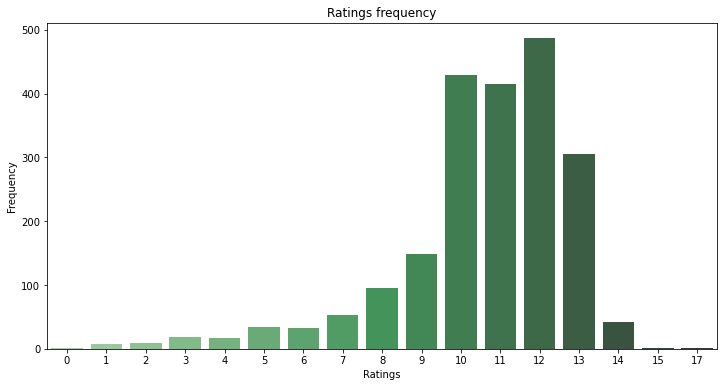

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
data = df_archive_copy.rating_numerator.value_counts()
data = data[data.index < 20]
sns.barplot(data.index, data.values, palette='Greens_d',ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()


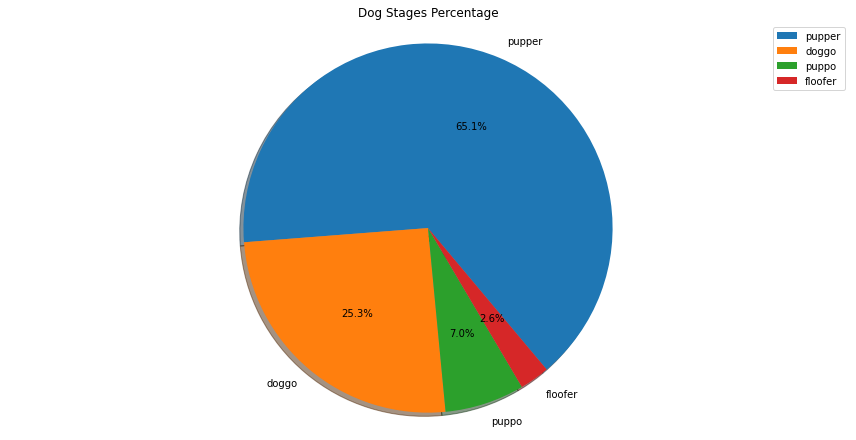

In [68]:
data = df_archive_copy.stage.value_counts()

fig1, ax1 = plt.subplots(figsize=(12, 6))
explode = (0.0, 0.0, 0, 0)  
ax1.pie(data.values, explode=explode, labels=data.index, autopct='%1.1f%%',
        shadow=True, startangle=-50)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend()
plt.tight_layout()
plt.title("Dog Stages Percentage")
plt.show()

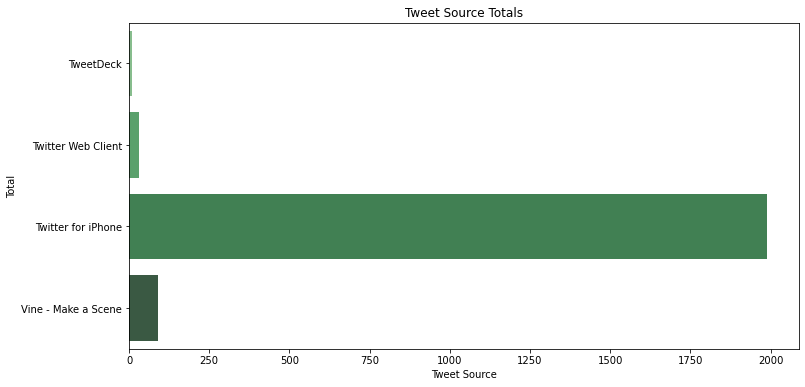

In [69]:

fig, ax = plt.subplots(figsize=(12, 6))
data = df_archive_copy.source.value_counts()
sns.barplot(y=data.index, x=data.values, palette='Greens_d',ax=ax)
ax.set(xlabel='Tweet Source', ylabel='Total', title='Tweet Source Totals')
plt.show()

In [70]:
df_clean.head(4)

,index,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908


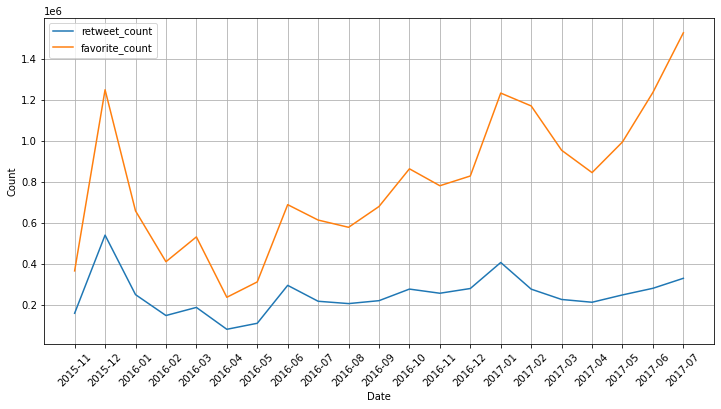

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))

df_clean['month'] = df_clean['timestamp'].apply(lambda x:x.strftime('%Y-%m'))

data =  df_clean.groupby('month')[['retweet_count', 'favorite_count']].aggregate(np.sum)
data = data.drop('2017-08')

plt.plot(data.index, data.values)

plt.grid()
plt.xticks(rotation=45)
plt.legend(['retweet_count', 'favorite_count'])
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()



<a id='conclusion'></a>
# Conclusion

after analysing WeRateDog Data we conclude : <br/>
1. percentage of pupper stage is most populate with 64% of total tweets, next is doggo with 25%.
2. most people use (Twitter for iphone) for twetter.
3. looking at trend, number of favorets and retweet generally increasing.

In [72]:
#Saving Cleaned data into twitter_archive_enhanced.csv
df_clean.to_csv("twitter_archive_master.csv")